# Parte de python (ignorar)

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime


In [6]:
# filtramos los datos de guanajuato
mexico = pd.read_csv("../datos/210109COVID19MEXICO.csv", engine='python')

mexico[mexico.ENTIDAD_RES==12].to_csv("../datos/guanajuato.csv", index=False)

### Guanajuato
Creamos las variables para generar el índice presentado a niver Guanajuato.

In [23]:
GUANAJUATO = pd.read_csv("../datos/guanajuato.csv", parse_dates=["FECHA_SINTOMAS", "FECHA_INGRESO"])
display(GUANAJUATO.head(3))

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2021-01-09,0386e9,1,12,12,2,12,12,29,2,...,2,1,1,2,97,3,99,México,97,1
1,2021-01-09,05a196,2,4,12,2,20,12,29,2,...,99,1,1,2,97,3,99,México,97,2
2,2021-01-09,1d2de1,2,12,12,1,12,12,29,1,...,2,1,1,2,97,3,99,México,97,97


In [24]:
GUANAJUATO_POSITIVOS.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA_LAB', 'RESULTADO_LAB',
       'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [25]:
# filtramos casos positivos y graficamos el número total de casos
GUANAJUATO_POSITIVOS = GUANAJUATO[GUANAJUATO.CLASIFICACION_FINAL.isin([1,2,3])]

In [63]:
GUANAJUATO_POSITIVOS

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2021-01-09,0386e9,1,12,12,2,12,12,29,2,...,2,1,1,2,97,3,99,México,97,1
1,2021-01-09,05a196,2,4,12,2,20,12,29,2,...,99,1,1,2,97,3,99,México,97,2
2,2021-01-09,1d2de1,2,12,12,1,12,12,29,1,...,2,1,1,2,97,3,99,México,97,97
3,2021-01-09,1b6863,1,4,12,2,12,12,1,2,...,99,1,1,2,97,3,99,México,97,2
4,2021-01-09,16b1a8,2,4,12,1,12,12,1,1,...,99,1,1,2,97,3,99,México,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52316,2021-01-09,2c2ac8,2,12,9,1,12,12,66,2,...,99,2,97,1,1,3,99,México,97,2
52446,2021-01-09,453d24,2,4,12,2,12,12,1,1,...,2,1,3,1,1,3,99,México,97,97
52453,2021-01-09,338380,1,6,12,1,12,12,29,1,...,2,2,97,1,2,1,99,México,97,97
52530,2021-01-09,340c8d,1,6,12,2,12,12,29,1,...,2,2,97,1,1,3,99,México,97,97


In [83]:
DIARIOS_GUANAJUATO = GUANAJUATO_POSITIVOS.groupby("FECHA_INGRESO", as_index=True).size()

n_unique_dates = len(DIARIOS_GUANAJUATO.index.unique())

fig = plt.figure(figsize=(n_unique_dates/5, n_unique_dates/10))

ax = DIARIOS_GUANAJUATO.plot.bar(x="FECHA_INGRESO", y="n", color='blue')
ax.set_xticklabels(labels=DIARIOS_GUANAJUATO.index, rotation=70, rotation_mode="anchor", ha="right");
ax.legend(labels=['n']);

plt.tight_layout()

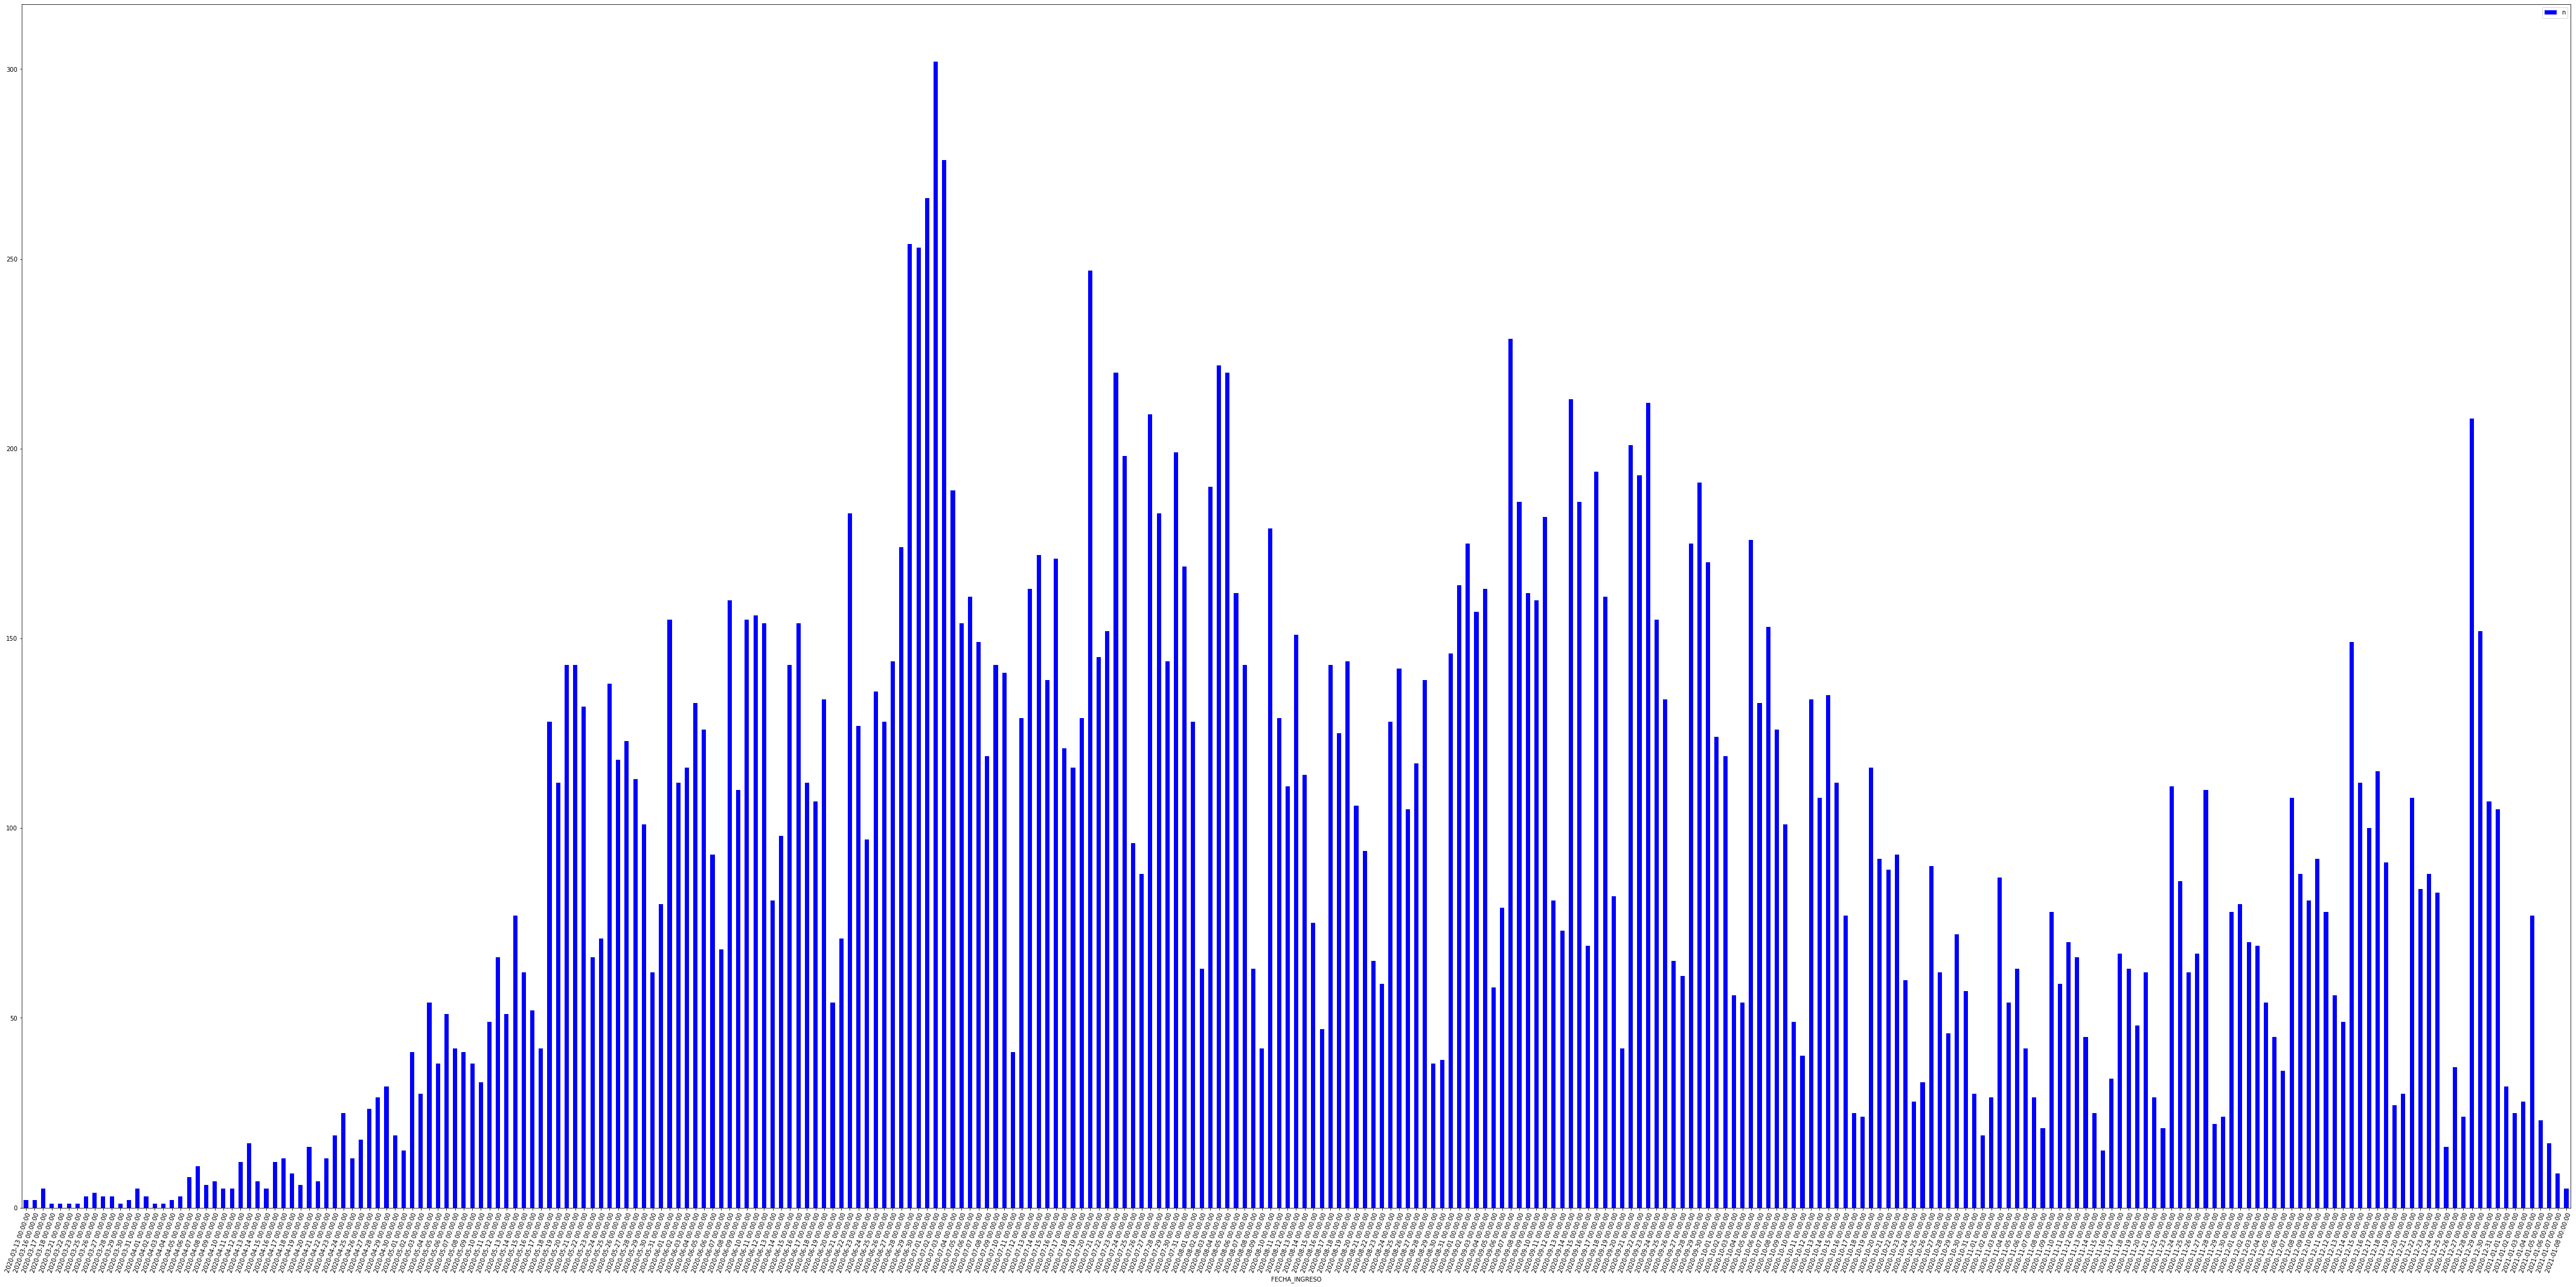

In [86]:
n_unique_dates = len(DIARIOS_GUANAJUATO.index.unique())

fig = plt.figure(figsize=(n_unique_dates/5, n_unique_dates/10))

ax = DIARIOS_GUANAJUATO.plot.bar(x="FECHA_INGRESO", y="n", color='blue')
ax.set_xticklabels(labels=DIARIOS_GUANAJUATO.index, rotation=70, rotation_mode="anchor", ha="right");
ax.legend(labels=['n']);

plt.tight_layout()

# Análisis con R (el bueno)

In [10]:
#Cargar entorno de R
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [11]:
%%R
## functions auxiliares

# creamos los lags de los conteos.
crear_suma_total_lags <- function(n, df, col){
  df["n_total"] <- df$n # inicializamos el valor de total
  for(i in 1:n){
    df[paste0("n_",i)] <- shift(df$n, n=i) # creamos el primer lag
    df[is.na(df)] <- 0 # imputamos con cero.
    df["n_total"] <- df["n_total"]+df[paste0("n_",i)] # sumamos el total
  }
    if (col==1){ # graficamos los totales.
        g <- ggplot(df, aes(x=FECHA_INGRESO, y=n_total))+
            geom_col(col="blue",fill="blue") 
    }
    else{
        g <- ggplot(df, aes(x=FECHA_SINTOMAS, y=n_total))+
            geom_col(col="blue",fill="blue") 
    }
    plot(g)
  df # retornamos el nuevo data.frame
}

# función para crear la media movil
media_movil <- function(df, k, m, col){
    if (col==1){
        df_mv <- df %>%
                    select(FECHA_INGRESO, n) %>%
                    mutate(x_mv = rollmean(n, k = k, fill = NA))
        df_mv["n_lag_m"] <- shift(df_mv$x_mv, n=m)
        df_mv <- df_mv[!is.na(df_mv$n_lag_m),]
        df_mv["D"] <- df_mv["x_mv"]/df_mv["n_lag_m"] 
    }
    else{
        df_mv <- df %>%
                    select(FECHA_SINTOMAS, n) %>%
                    mutate(x_mv = rollmean(n, k = k, fill = NA))
        df_mv["n_lag_m"] <- shift(df_mv$x_mv, n=m)
        df_mv <- df_mv[!is.na(df_mv$n_lag_m),]
        df_mv["D"] <- df_mv["x_mv"]/df_mv["n_lag_m"]
    }
    df_mv
}

# cargamos la librerias
library(tidyverse)
library(lubridate)
library(data.table)
library(zoo)
library(gridExtra)


In [12]:
%%R
# cargamos los datos de guanajuato.csv
guanajuato <- read.csv("../datos/guanajuato.csv", header=T, 
                       colClasses=c(FECHA_SINTOMAS="Date",
                                    FECHA_INGRESO="Date"))

# filtramos los datos confirmados
confirmados_guanajuato <- guanajuato %>% 
  filter(CLASIFICACION_FINAL %in% c(1,2,3))

In [13]:
# Utilizamos la fecha de ingreso

In [14]:
%%R
confirmados_c_guanajuato <- confirmados_guanajuato %>% group_by(FECHA_INGRESO) %>% count()

fechas <- seq.Date(from=as.Date("2020-03-13"), to=as.Date("2021-01-08"), by=1)
fechas_totales <- data.frame(fechas)

totales_guanajuato_completo <- merge(confirmados_c_guanajuato, fechas_totales, 
                                     by.x="FECHA_INGRESO", by.y = "fechas", all = T)

totales_guanajuato_completo[is.na(totales_guanajuato_completo)] <- 0 



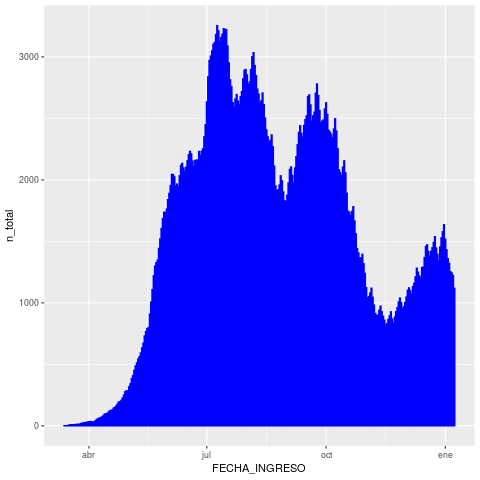

In [15]:
%%R
totales_guanajuato_lags_ingreso <- crear_suma_total_lags(17, totales_guanajuato_completo, 1)

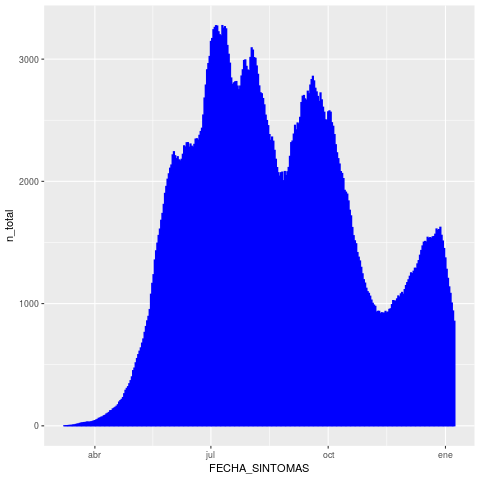

In [17]:
%%R
confirmados_s_guanajuato <- confirmados_guanajuato %>% group_by(FECHA_SINTOMAS) %>% count()

fechas <- seq.Date(from=as.Date(min(confirmados_s_guanajuato$FECHA_SINTOMAS)), to=as.Date("2021-01-08"), by=1)
fechas_totales <- data.frame(fechas)

totales_guanajuato_completo <- merge(confirmados_s_guanajuato, fechas_totales, 
                                     by.x="FECHA_SINTOMAS", by.y = "fechas", all = T)

totales_guanajuato_completo[is.na(totales_guanajuato_completo)] <- 0 

totales_guanajuato_lags_sintomas <- crear_suma_total_lags(18, totales_guanajuato_completo, 0)

In [18]:
%%R
borrador1 <- merge(totales_guanajuato_lags_ingreso%>% select(FECHA_INGRESO, n_total), 
            totales_guanajuato_lags_sintomas%>% select(FECHA_SINTOMAS, n_total), by.x="FECHA_INGRESO", by.y="FECHA_SINTOMAS")

borrador1 <- borrador1 %>%
    mutate(total=n_total.y-n_total.x) 

borrador1 %>% head()

# no funciono debido a que había valores negativos

  FECHA_INGRESO n_total.x n_total.y total
1    2020-03-13         2         5     3
2    2020-03-14         2         5     3
3    2020-03-15         2         8     6
4    2020-03-16         4         9     5
5    2020-03-17         9        12     3
6    2020-03-18        10        14     4


# Casos reportados

$x_i$: número **total** en el día i.

$X(t)=\frac{1}{7}\sum_{i=t-3}^{t+3}x_i$

$D=\frac{X(t)}{X(t-13)}$


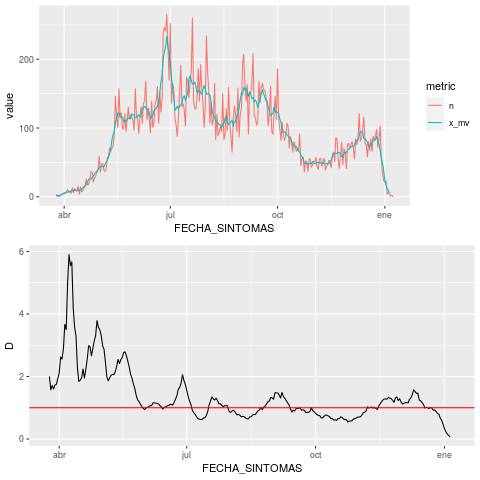

In [25]:
%%R
guanajuto_media_movil <- media_movil(totales_guanajuato_completo, 7, 14, 0)
p1 <- guanajuto_media_movil %>%
  gather(metric, value, n:x_mv) %>%
  ggplot(aes(FECHA_SINTOMAS, value, color = metric)) +
  geom_line()

p2 <- ggplot(guanajuto_media_movil, aes(FECHA_SINTOMAS, D))+
    geom_line()+
    geom_hline(yintercept=1, color="red")

grid.arrange(p1, p2, ncol=1)

### Casos activos
0. Caso activos: fecha de ingreso -14 días atras. Y quitando la suma de muertos en la X ventana de tiempo.
1. Caso activos: fecha de ingreso -14 días atras.

2. Caso activos_esperada: fecha de sintomas -14 hasta la fecha de ingreso. 
3. Caso activos_esperada: fecha de sintomas -3 hasta la fecha de ingreso.

4. Caso activos_real: 

### Muertos
1. Comparar este caso. 

### Opción 2. Caso_activos_esperada

In [26]:
%%R
confirmados_guanajuato %>%
    select(FECHA_SINTOMAS, FECHA_INGRESO, FECHA_DEF, TIPO_PACIENTE) %>%
    head(2)


  FECHA_SINTOMAS FECHA_INGRESO  FECHA_DEF TIPO_PACIENTE
1     2020-03-24    2020-03-31 2020-04-04             2
2     2020-03-30    2020-03-30 2020-04-06             2


In [27]:
%%R
fechas <- seq.Date(from=as.Date(min(confirmados_s_guanajuato$FECHA_SINTOMAS)), to=as.Date("2021-01-08"), by=1)
fechas_totales <- data.frame(fechas)
fechas_totales$n_activo <- 0

In [28]:
%%R
fechas_totales
for (i in 1:nrow(fechas_totales)){
    total_i<- confirmados_guanajuato %>% filter(between(as.Date(fechas_totales[i, "fechas"]),FECHA_SINTOMAS, FECHA_INGRESO)) %>% count()
    fechas_totales[i,"n_activo"] <- total_i$n
    
}

In [29]:
%%R
names(fechas_totales)<- names(totales_guanajuato_completo)

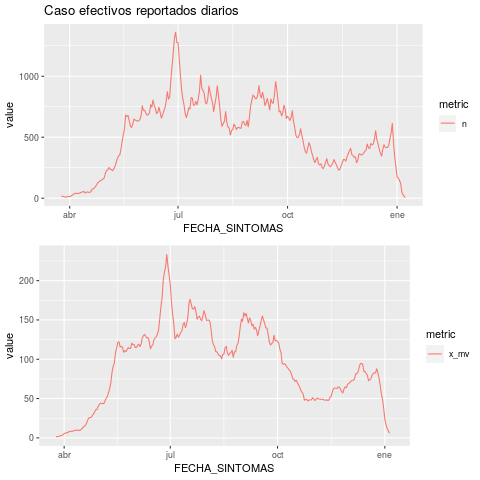

In [30]:
%%R
guanajuto_media_movil_activos <- media_movil(fechas_totales, 7, 14, 0)

p1 <- guanajuto_media_movil_activos %>%
  gather(metric, value, n) %>%
  ggplot(aes(FECHA_SINTOMAS, value, color = metric)) +
  geom_line()+
labs(title="Caso efectivos reportados diarios")
p2 <- guanajuto_media_movil %>%
  gather(metric, value, x_mv) %>%
  ggplot(aes(FECHA_SINTOMAS, value, color = metric)) +
  geom_line()

grid.arrange(p1, p2, ncol=1)

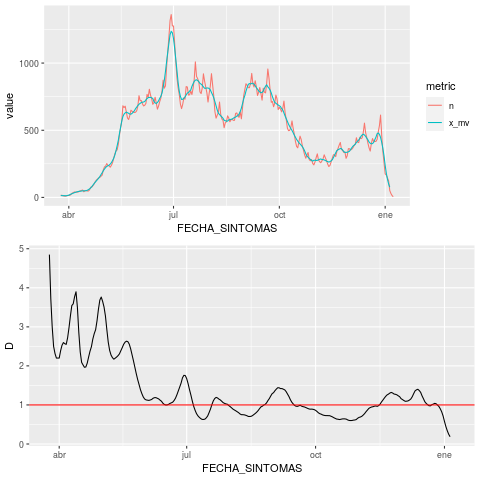

In [31]:
%%R
p1 <- guanajuto_media_movil_activos %>%
  gather(metric, value, n:x_mv) %>%
  ggplot(aes(FECHA_SINTOMAS, value, color = metric)) +
  geom_line()

p2 <- ggplot(guanajuto_media_movil_activos, aes(FECHA_SINTOMAS, D))+
    geom_line()+
    geom_hline(yintercept=1, color="red")

grid.arrange(p1, p2, ncol=1)

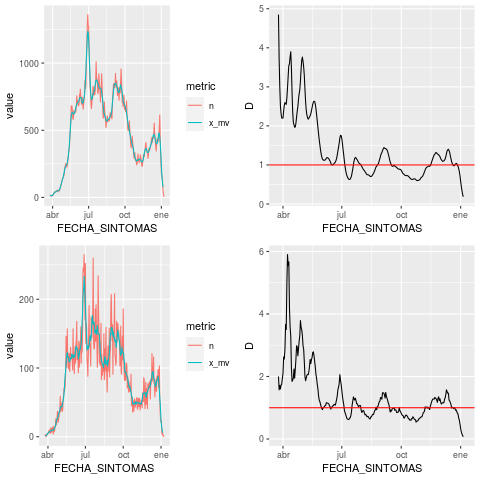

In [32]:
%%R
p3 <- guanajuto_media_movil %>%
  gather(metric, value, n:x_mv) %>%
  ggplot(aes(FECHA_SINTOMAS, value, color = metric)) +
  geom_line()

p4 <- ggplot(guanajuto_media_movil, aes(FECHA_SINTOMAS, D))+
    geom_line()+
    geom_hline(yintercept=1, color="red")

grid.arrange(p1, p2, p3, p4, ncol=2)

In [240]:
%%R
guanajuto_media_movil_activos %>% filter(FECHA_SINTOMAS>as.Date("2020-11-10")) %>%
    head()

  FECHA_SINTOMAS   n     x_mv  n_lag_m         D
1     2020-11-11 275 270.1429 283.0000 0.9545684
2     2020-11-12 249 266.8571 275.5714 0.9683774
3     2020-11-13 230 263.1429 270.1429 0.9740878
4     2020-11-14 238 266.4286 276.2857 0.9643226
5     2020-11-15 264 272.2857 277.2857 0.9819681
6     2020-11-16 291 280.1429 275.0000 1.0187013
